In [25]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')

# Read data from file
df = pd.read_csv('googleplaystore.csv', encoding = 'utf8')

In [26]:
len(df)

10841

In [27]:
df[['App','Category','Rating','Reviews','Price','Size','Installs','Android Ver','Last Updated']].head()

,App,Category,Rating,Reviews,Price,Size,Installs,Android Ver,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0,19M,"10,000+",4.0.3 and up,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,14M,"500,000+",4.0.3 and up,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,8.7M,"5,000,000+",4.0.3 and up,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,25M,"50,000,000+",4.2 and up,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,2.8M,"100,000+",4.4 and up,"June 20, 2018"


# Data cleaning

In [29]:
# Google Play
# 去除异常值
df = df.dropna()
df = df.drop_duplicates().reset_index(drop=True)
df = df[(df[['Size']]!= 'Varies with device').all(axis=1)]

# 换算Size 统一为kb
size=[]
for i in df['Size']:
    if i.endswith("M"):
        i=round(float(i.replace("M",""))*1024,1)
        size.append(i)
    else:
        i=round(float(i.replace("k","")),1)
        size.append(i)
df['Size']=size

In [30]:
# 清洗numeric variable 
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'])

In [31]:
df['Android Ver'][df['Android Ver'] == 'Varies with device'] = '4.1 and up'
df['android_ver_int'] = df['Android Ver'].str[0:1].astype(int)

In [32]:
from datetime import datetime,date
temp=pd.to_datetime(df['Last Updated'])
df['last_updated_days'] = temp.apply(lambda x:date.today()-datetime.date(x))
df['last_updated_days'] = [i.days for i in df['last_updated_days']]

In [33]:
len(df)

7418

In [34]:
df[['App','Category','Rating','Reviews','Price','Size','Installs','android_ver_int','last_updated_days']].head()

,App,Category,Rating,Reviews,Price,Size,Installs,android_ver_int,last_updated_days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0.0,19456.0,10000,4,473
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0.0,14336.0,500000,4,465
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.0,8908.8,5000000,4,267
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0.0,25600.0,50000000,4,321
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.0,2867.2,100000,4,309


# Variable coding

In [10]:
# import numpy as np
# np.corrcoef(df['Reviews_log'],df['Installs_log'])

In [11]:
# select numerical features
features = ['Reviews','Price','Size','android_ver_int','last_updated_days'] # 'Installs'

In [12]:
# select categorical features
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat',drop_first=True)], axis=1)
category_list = category_list[1:]

In [13]:
features.extend(category_list)

# LinearRegression

In [14]:
X = df[features]
y = df['Rating']

In [15]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

model.fit(X,y)
print('R2 using X:', model.score(X,y))
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
print('---------------------------------------------------------------------')

for i in features:
    df[i + '_log'] = np.log(df[i] + 1)
X_log = df[[i + '_log' for i in features]]

model.fit(X_log, y)
print('R2 using X_log: ', model.score(X_log, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R2 using X: 0.05397528889959302
intercept: 4.451044730445677
coefficients: [ 1.76445133e-08 -5.73139098e-04  1.10551456e-07 -1.01093172e-03
 -1.78465421e-04 -2.33901963e-01 -9.04441408e-02 -1.59329399e-02
 -2.50427625e-01 -2.49504555e-01 -2.51973987e-01 -4.29527807e-01
  2.62017272e-02 -2.31623331e-01  1.02463581e-01 -2.58017625e-01
 -2.89521029e-01 -1.62311613e-01 -2.26103967e-01 -1.16864205e-01
 -2.51453903e-01 -1.08197481e-01 -1.58433861e-01 -1.68329257e-01
 -1.06270854e-01 -1.61122512e-01 -2.22062989e-01 -1.63171424e-01
 -3.42039011e-01 -3.25983609e-01  5.95667274e-03 -2.01895754e-01
 -3.68862811e-02 -1.07174695e-01 -3.18462289e-01 -2.23232395e-01
 -3.51394606e-01]
---------------------------------------------------------------------
R2 using X_log:  0.07694934222465033
Intercept: 5.188947594780537
Coefficients: [ 0.02376966  0.0503436  -0.02244416  0.02400286 -0.13583883 -0.32109941
 -0.09891491 -0.01275841 -0.32135381 -0.37733132 -0.41702587 -0.63545478
 -0.04077598 -0.45131289  

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_log)
X_log_standardized = pd.DataFrame(scaler.transform(X_log), columns = X_log.columns)

model.fit(X_log_standardized, y)
print('R2 using X_log_standardized: ', model.score(X_log_standardized, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R2 using X_log_standardized:  0.07694934222465033
Intercept: 4.1713939067134
Coefficients: [ 0.08770514  0.02459834 -0.02950015  0.00541119 -0.07780356 -0.0204302
 -0.00483161 -0.00121633 -0.03821214 -0.02119321 -0.0475112  -0.06016473
 -0.00317894 -0.02960465  0.00942847 -0.04968189 -0.03308935 -0.02945417
 -0.02106861 -0.0101953  -0.04673428 -0.04828865 -0.06376217 -0.02686112
 -0.02044891 -0.03129244 -0.04619836 -0.03305485 -0.047793   -0.09735898
 -0.00338892 -0.03942824 -0.00238905 -0.01427035 -0.04364858 -0.03470035
 -0.04047653]


In [17]:
import statsmodels.api as sm
# ART_AND_DESIGN为0
# Fit linear regression model using statsmodel package
X2 = sm.add_constant(X_log_standardized)
y = y.values.reshape(-1,1) # transfer y from pandas.series to 2D array

model = sm.OLS(y,X2).fit() # OLS regression 最小二乘法回归
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.63
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          3.04e-101
Time:                        12:15:13   Log-Likelihood:                -5790.9
No. Observations:                7418   AIC:                         1.166e+04
Df Residuals:                    7380   BIC:                         1.192e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.1714      0.006    678.440      0.000       4.159       4.183
Reviews_log                     0.0877      0.007     12.139      0.000       0.074       0.102
Price_log                       0.0246      0.006      3.900      0.000       0.012       0.037
Size_log                       -0.0295      0.008     -3.719      0.000      -0.045      -0.014
android_ver_int_log             0.0054      0.008      0.714      0.475      -0.009       0.020
last_updated_days_log          -0.0778      0.008     -9.620      0.000      -0.094      -0.062
cat_AUTO_AND_VEHICLES_log      -0.0204      0.009     -2.310      0.021      -0.038      -0.003
cat_BEAUTY_log                 -0.0048      0.008     -0.615      0.538      -0.020       0.011
cat_BOOKS_AND_REFERENCE_log    -0.0012      0.011     -0.107      0.915      -0.023       0.021
cat_BUSINESS_log               -0.0382      0.013     -2.855      0.004      -0.064      -0.012
cat_COMICS_log                 -0.0212      0.008     -2.546      0.011      -0.038      -0.005
cat_COMMUNICATION_log          -0.0475      0.013     -3.665      0.000      -0.073      -0.022
cat_DATING_log                 -0.0602      0.011     -5.332      0.000      -0.082      -0.038
cat_EDUCATION_log              -0.0032      0.010     -0.320      0.749      -0.023       0.016
cat_ENTERTAINMENT_log          -0.0296      0.009     -3.285      0.001      -0.047      -0.012
cat_EVENTS_log                  0.0094      0.008      1.195      0.232      -0.006       0.025
cat_FINANCE_log                -0.0497      0.014     -3.494      0.000      -0.078      -0.022
cat_FOOD_AND_DRINK_log         -0.0331      0.010     -3.479      0.001      -0.052      -0.014
cat_HEALTH_AND_FITNESS_log     -0.0295      0.013     -2.305      0.021      -0.055      -0.004
cat_HOUSE_AND_HOME_log         -0.0211      0.008     -2.518      0.012      -0.037      -0.005
cat_LIBRARIES_AND_DEMO_log     -0.0102      0.009     -1.155      0.248      -0.028       0.007
cat_LIFESTYLE_log              -0.0467      0.014     -3.238      0.001      -0.075      -0.018
cat_GAME_log                   -0.0483      0.024     -1.988      0.047      -0.096      -0.001
cat_FAMILY_log                 -0.0638      0.029     -2.186      0.029      -0.121      -0.007
cat_MEDICAL_log                -0.0269      0.015     -1.846      0.065      -0.055       0.002
cat_SOCIAL_log                 -0.0204      0.012     -1.695      0.090      -0.044       0.003
cat_SHOPPING_log               -0.0313      0.012     -2.656      0.008      -0.054      -0.008
cat_PHOTOGRAPHY_log            -0.0462      0.013     -3.444      0.001      -0.072      -0.020
cat_SPORTS_log                 -0.0331      0.014     -2.438      0.015      -0.060      -0.006
cat_TRAVEL_

In [18]:
#predict
#model.coef_
#model.intercept_

In [19]:
from pandas import *
from pylab import * 

In [20]:
df1 = pivot_table(df, values='Rating', index=['Category'],aggfunc={'Rating': np.mean})
df1 = df1.sort_values(['Rating'],ascending=False)

(3, 4.6)

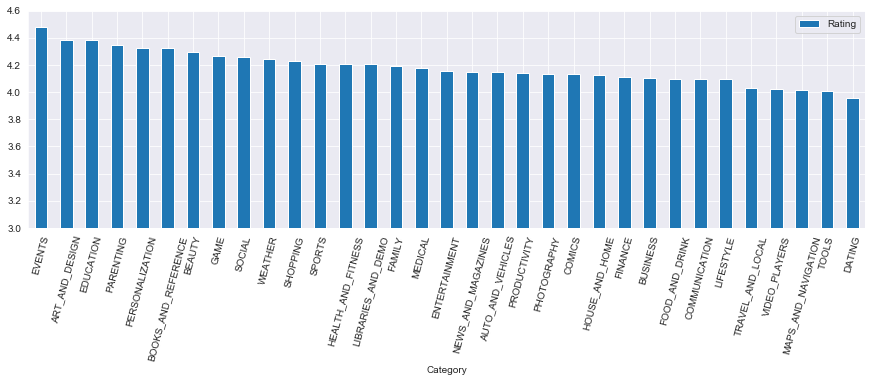

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plot=df1.plot(kind='bar',figsize=(15,4))
sns.set_style("darkgrid")
plot.set_xticklabels(df1.index, rotation=75, ha="center", fontsize=10)
plot.set_ylim(3,4.6)

In [22]:
# 前五：EVENTS, ART_AND_DESIGN, EDUCATION, PARENTING, PERSONALIZATION
# 倒五：DATING, TOOLS, MAPS_AND_NAVIGATION, VIDEO_PLAYERS, TRAVEL_AND_LOCAL

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

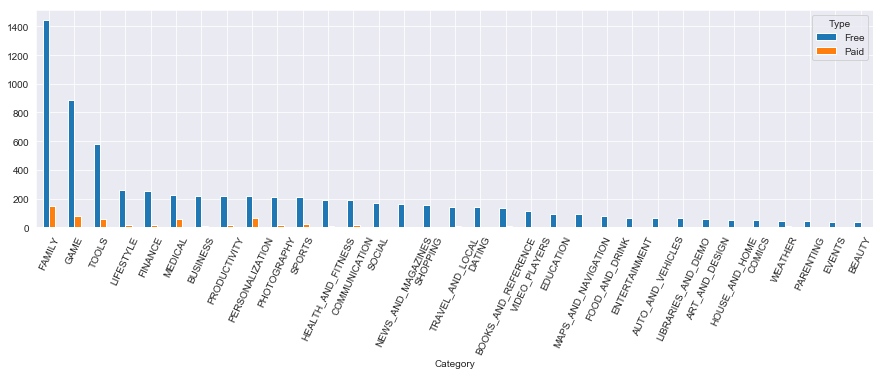

In [23]:
df = df.merge(pd.crosstab(df['Category'], df['Type']), on='Category', how='left')
aaa = pd.crosstab(df['Category'], df['Type'])
bbb = aaa.sort_values('Free', ascending=False)
bbb.plot(kind='bar',figsize=(15,4))
plt.xticks(rotation=65)